# Import Library and Dataset

In [1]:
# mengimport library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import yellowbrick

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


# Exploratory Data Analysis

In [3]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
# overview
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:10]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.0,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88...."
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23, 33, 48, 30, 20, 49]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58, 226.74..."
5,Male,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,object,0,0.0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Med..."
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


In [6]:
# Check Duplicates Data
df.duplicated().sum()

0

## Key Takeways

1. Dataset consisted of 1000 rows and 11 features.
2. The dataset has 6 categoric & 5 numeric features.
3. Missing values is found in Daily Time Spent on Site, Area Income, Daily Internet Usage, Male.
4. There is no duplicate data.
5. Time stamp should be change into datetime datatype.

# Statistical Summary

In [7]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
nums

['Unnamed: 0',
 'Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage']

In [8]:
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
cats

['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

In [9]:
df[nums].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,500.0,289.0,0.0,250.0,500.0,749.0,999.0
Daily Time Spent on Site,987.0,65.0,16.0,33.0,51.0,68.0,78.0,91.0
Age,1000.0,36.0,9.0,19.0,29.0,35.0,42.0,61.0
Area Income,987.0,384864671.0,94079990.0,97975500.0,328632990.0,399068320.0,458355450.0,556393600.0
Daily Internet Usage,989.0,180.0,44.0,105.0,139.0,183.0,219.0,267.0


In [10]:
df[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


## Key Takeways

1. Average daily `time spent on site` is about 1 hour (65 mins).
2. Average customer `age` is 36.
3. Most features are distributed normally.
4. Customers is dominated by women.
5. Surabaya is the top `city` of the customer.
6. Most clicked ad category is otomotif.
7. `Clicked on Ad` Yes and No is normally distributed.


# Univariate Analysis

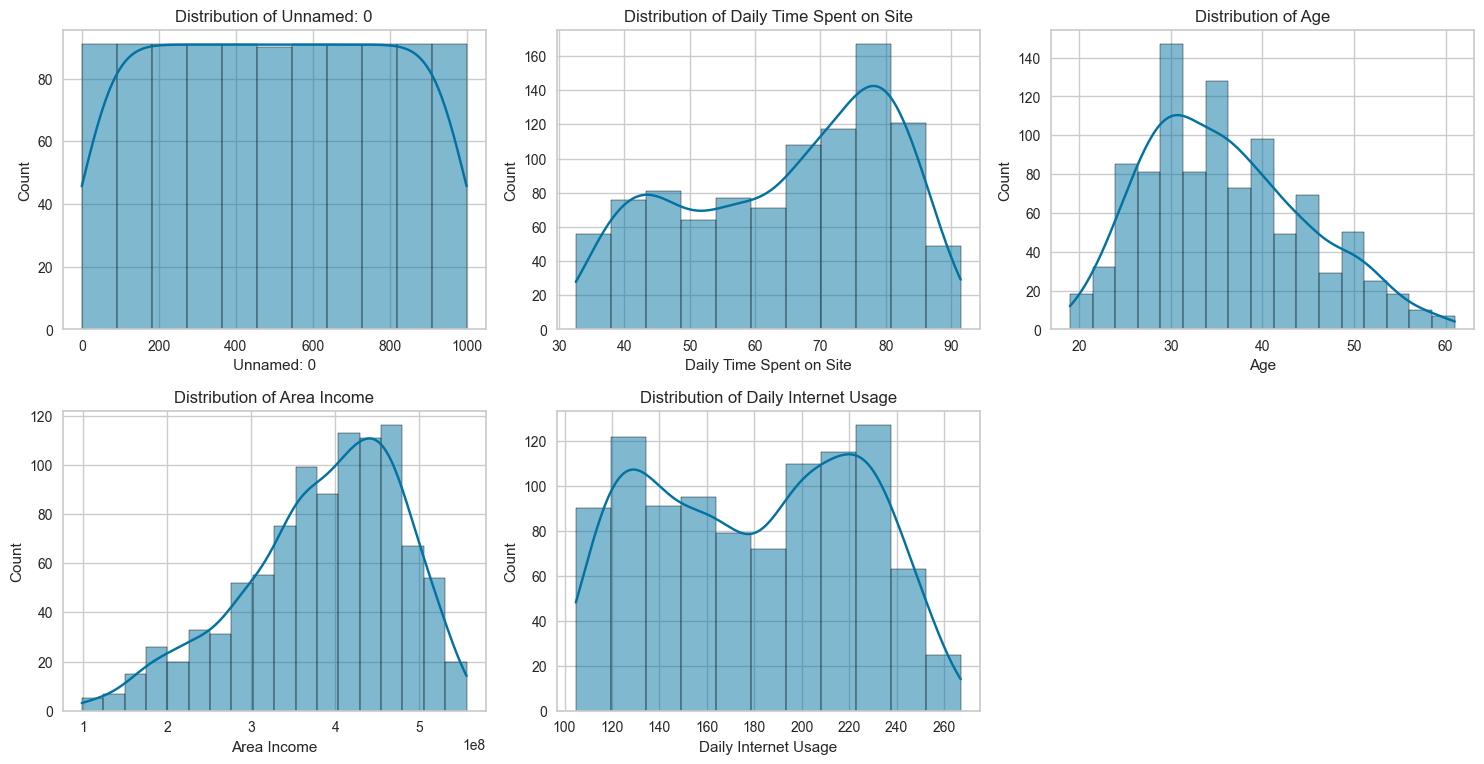

In [11]:


# Create distribution plots for each column
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed

for i, col in enumerate(df[nums].columns):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns grid of subplots
    sns.histplot(df[nums][col], kde=True)  # Create distribution plot with KDE
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

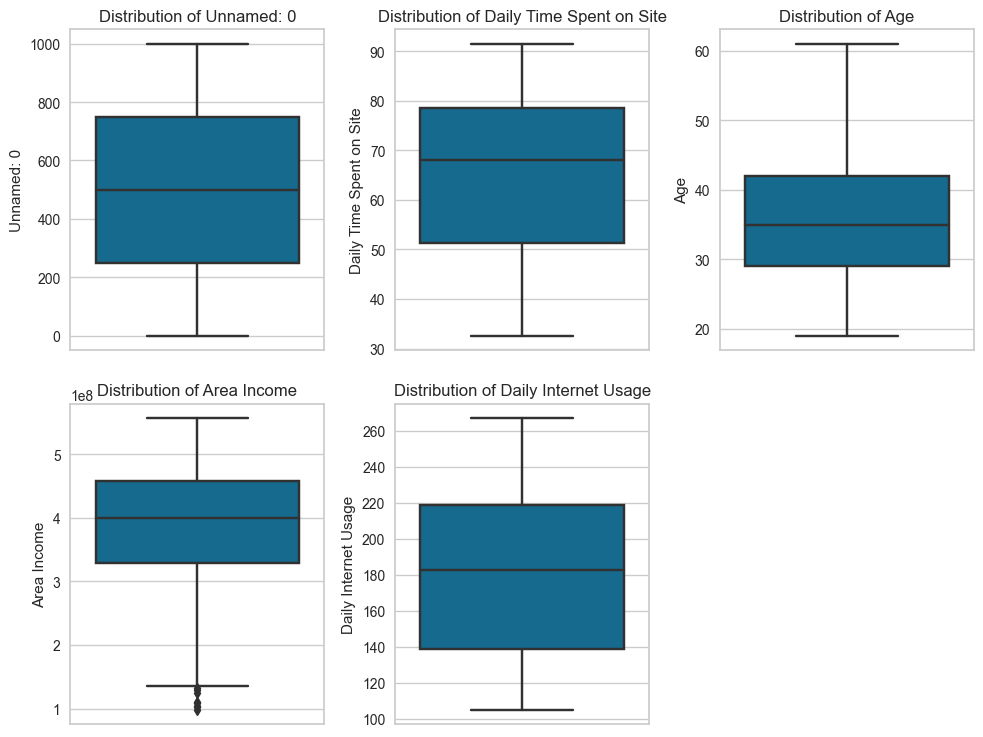

In [12]:


# Create distribution plots for each column
plt.figure(figsize=(10,15))  # Adjust the figure size as needed

for i, col in enumerate(df[nums].columns):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns grid of subplots
    sns.boxplot(df, y=df[nums[i]], orient='v')  # Create distribution plot with boxplot
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [13]:
# For categorical variable to count the variable value
for col in df[cats]:
    print(f"Value counts of \033[1m{col}\033[0m column")
    print(df[cats][col].value_counts())
    print()

Value counts of Male column
Male
Perempuan    518
Laki-Laki    479
Name: count, dtype: int64

Value counts of Timestamp column
Timestamp
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: count, Length: 997, dtype: int64

Value counts of Clicked on Ad column
Clicked on Ad
No     500
Yes    500
Name: count, dtype: int64

Value counts of city column
city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Ban

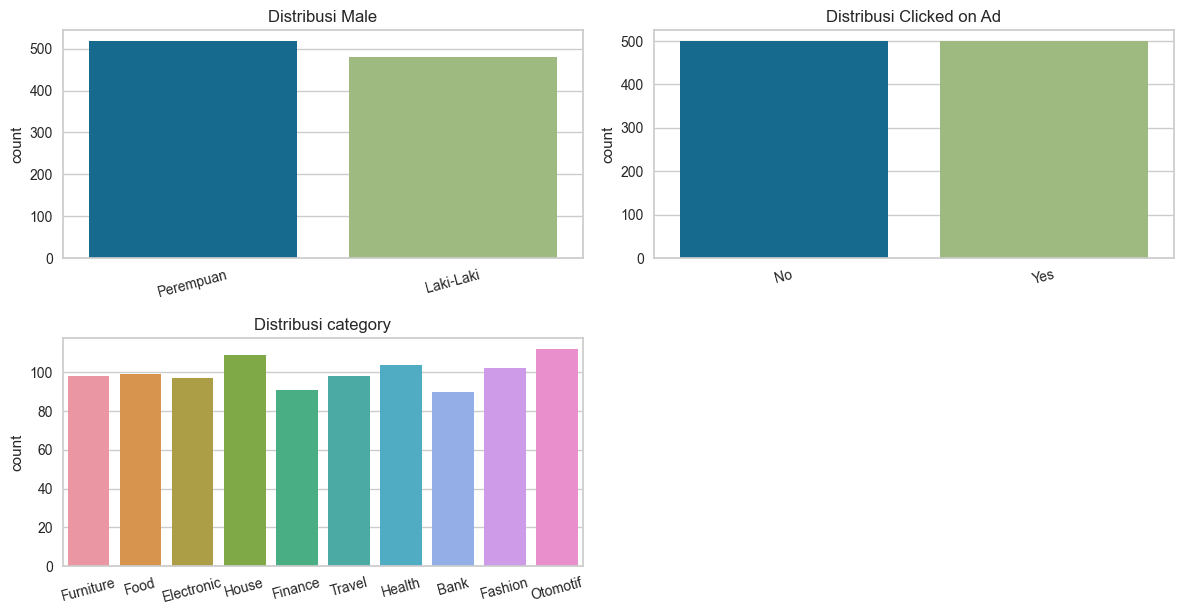

In [14]:
dist_cat = ['Male','Clicked on Ad','category']

plt.figure(figsize=(12,9))
# sns.set_theme(style='dark', palette='dark:#5A9_r')
for i in range(len(dist_cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(data=df, x=dist_cat[i])
    plt.title(f'Distribusi {dist_cat[i]}')
    plt.xlabel('')
    plt.xticks(rotation=15)
plt.tight_layout()

## Key Takeaways:
1. Most of the numeric features are slightly skewed 
2. There are outliers in Area Income feature
3. Clicked on Ad (target feature) is balanced

# Bivariate Analysis

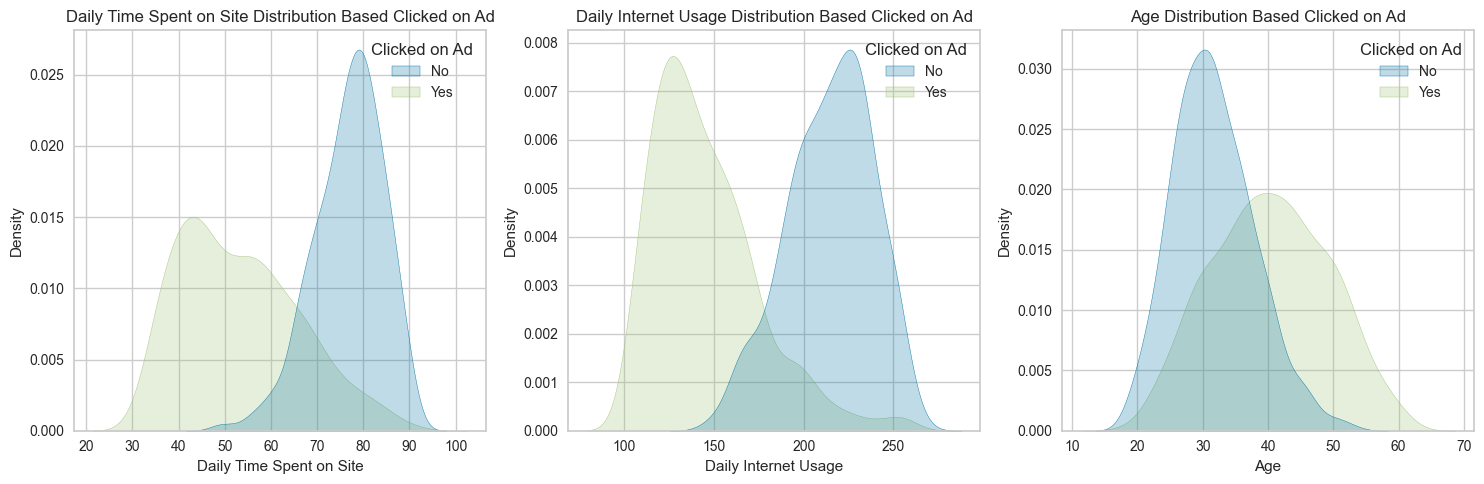

In [15]:
feats = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Age']
target = 'Clicked on Ad'

plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df, x=df[feats[i]], hue=df[target], fill=True).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

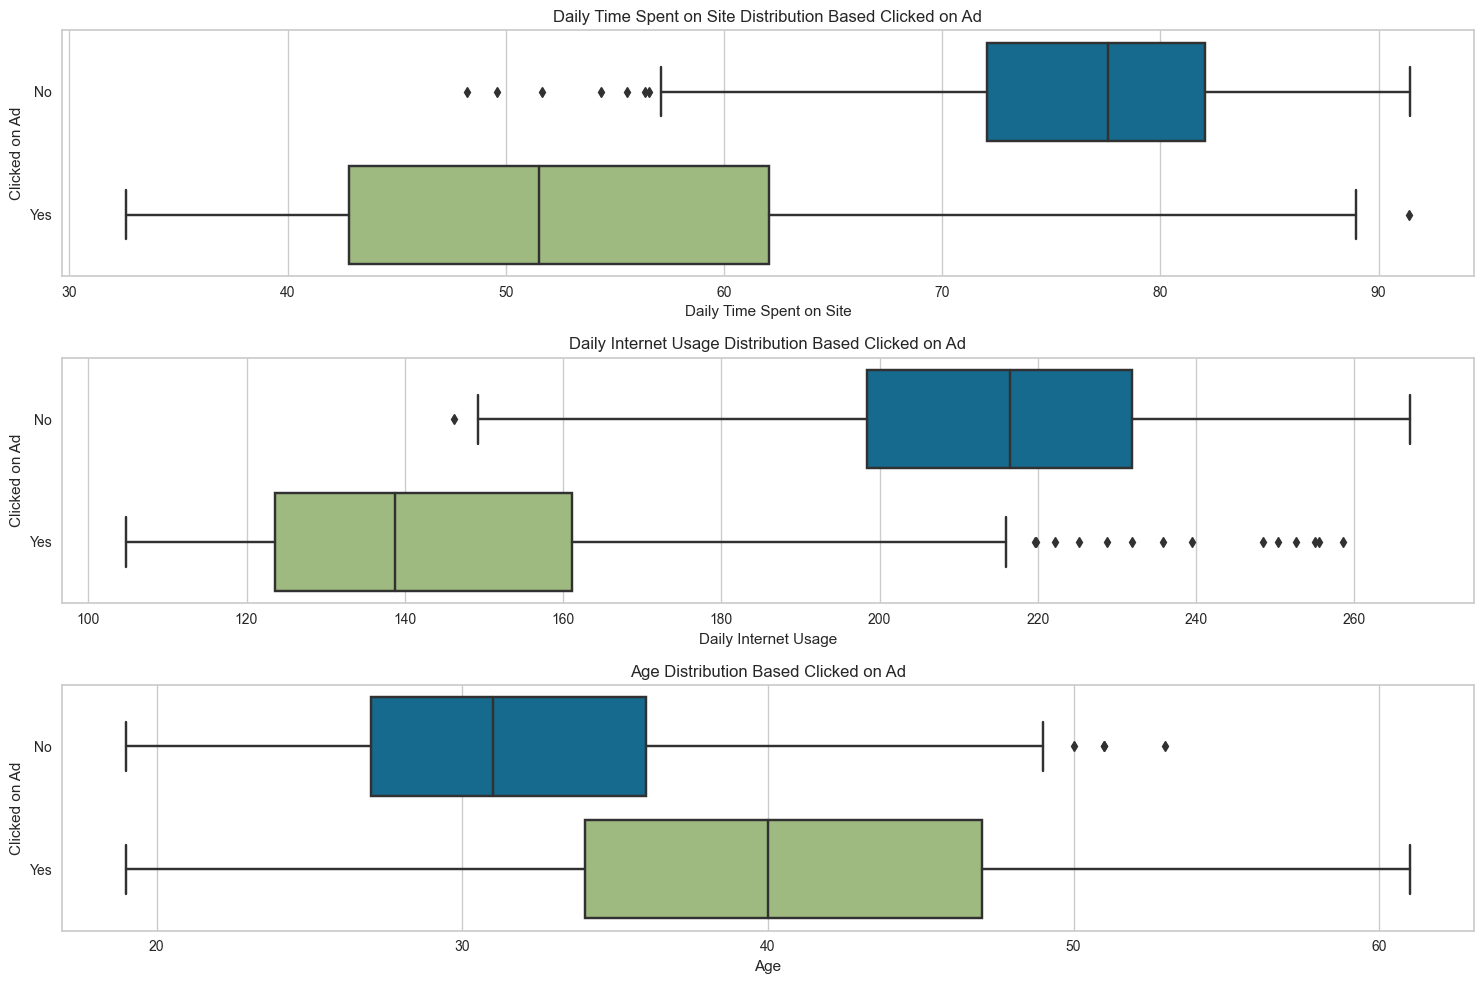

In [16]:
plt.figure(figsize=(15, 10))
for i in range(0, len(feats)):
    plt.subplot(3, 1, i+1)
    sns.boxplot(x=df[feats[i]], y=df[target], data=df).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
#     sns.kdeplot(df, x=df[feats[i]], hue=df[target], fill=True).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

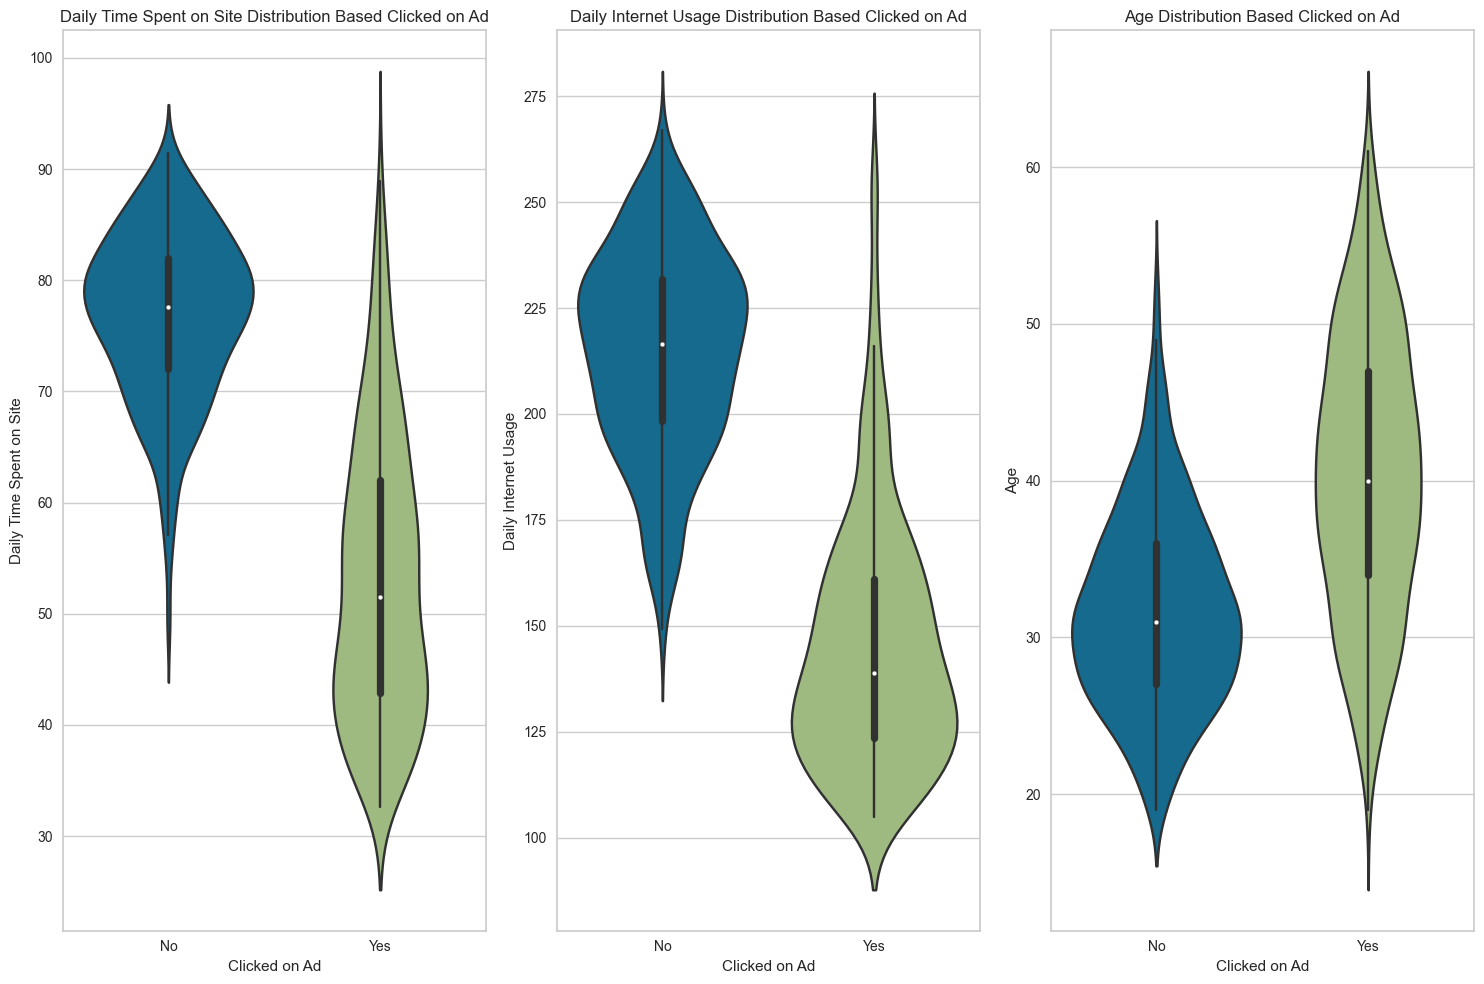

In [17]:
plt.figure(figsize=(15, 10))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.violinplot(y=df[feats[i]], x=df[target], data=df).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
#     sns.kdeplot(df, x=df[feats[i]], hue=df[target], fill=True).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

## Key Takeaways
1. Daily Time Spent on Site
    - Customer yang menghabiskan waktu lebih sedikit di site (< 60 menit) cenderung melakukan klik pada iklan.
2. Daily Internet Usage
    - Customer dengan pemakaian internet lebih rendah cenderung melakukan klik pada iklan.
3. Age
    - Customer dengan umur lebih tua lebih cnederung melakukan klik pada iklan.

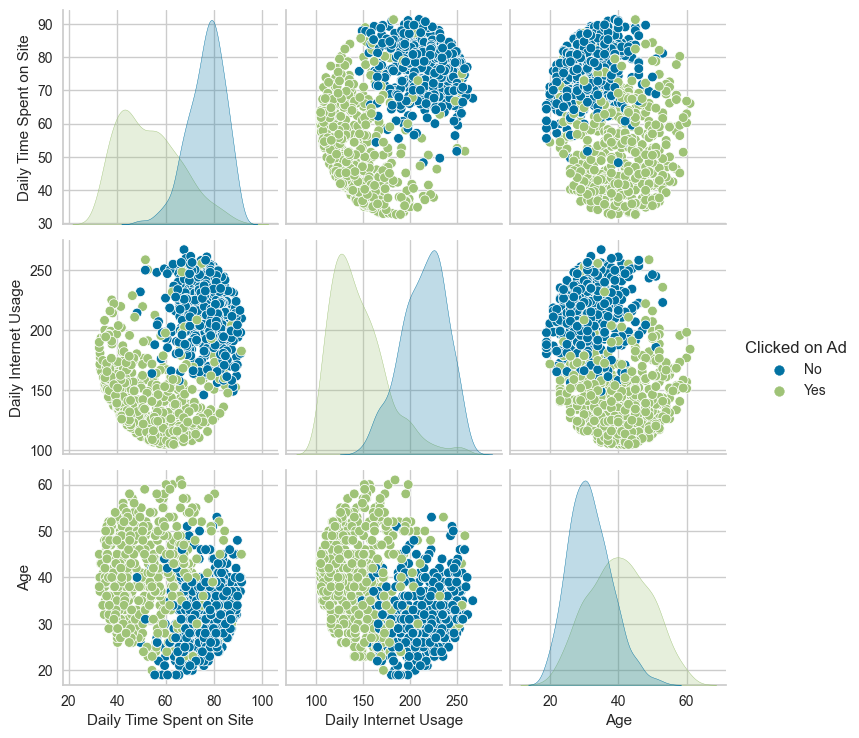

In [18]:
sns.pairplot(data=df, vars=feats, hue=target)
plt.show()

## Heatmap Correlation

In [19]:
feat = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Age']
target = 'Clicked on Ad'

df_corr = df[nums].copy()
df_corr['Clicked on Ad'] = df['Clicked on Ad'].map({'Yes':1, 'No':0})
df_corr.drop('Clicked on Ad', axis= 1, inplace = True)
df_corr

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,0,68.95,35,432837300.0,256.09
1,1,80.23,31,479092950.0,193.77
2,2,69.47,26,418501580.0,236.50
3,3,74.15,29,383643260.0,245.89
4,4,68.37,35,517229930.0,225.58
...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58
996,996,51.30,45,474475190.0,134.42
997,997,NaN,51,296910040.0,120.37
998,998,55.55,19,293445530.0,187.95


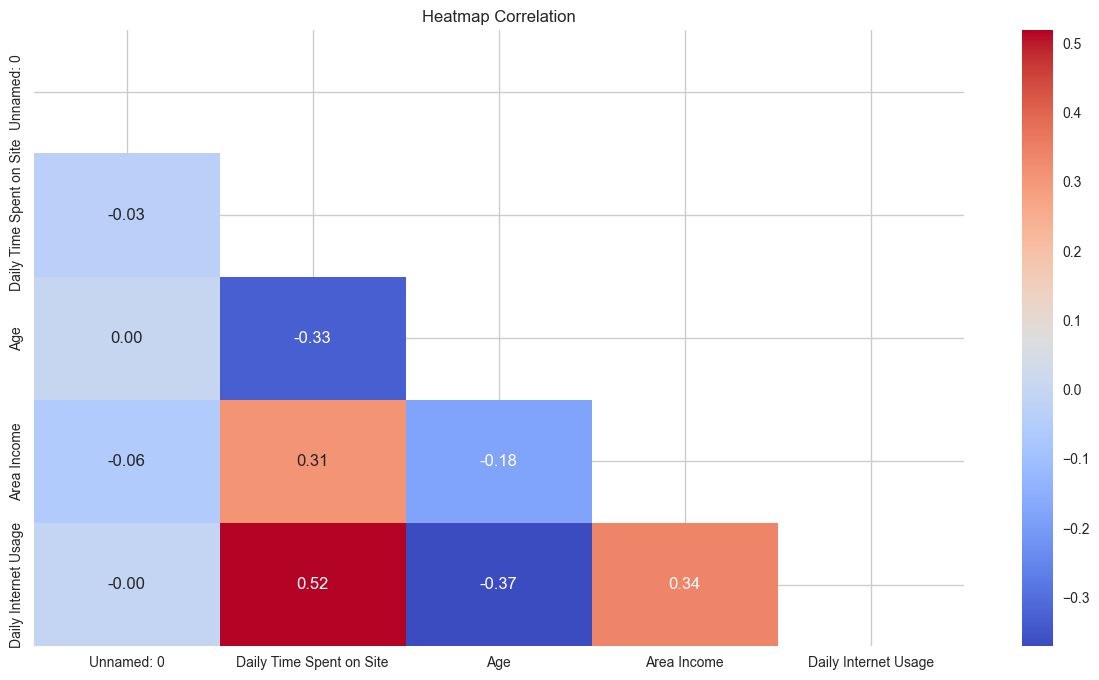

In [20]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

# plot the heatmap
correlation = df_corr.corr()
mask = np.triu(np.ones_like(df_corr.corr(), dtype= bool))
sns.heatmap(correlation, annot=True, mask= mask, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Correlation')
plt.show()

## Key Takeaways
1. The features are not redundant to each other.
2. Highest correlation is seen between Daily Internet Usage and Daily Time Spent on Site, it is due to the higher time spent on site needs higher internet usage also.

# Data Preprocessing

## Data Cleaning

In [21]:
df_clean = df.copy()
df_clean

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


In [22]:
# Missing Values
df_clean.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [23]:
df_clean['Male'].mode()[0]

'Perempuan'

In [24]:
#Fill Missing Categorical Data 
df_clean['Male'].fillna(df_clean['Male'].mode()[0], inplace = True)
df_clean.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         0
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [25]:
df_clean[nums].columns

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')

In [26]:
#Fill Missing numerical data
for col in df_clean[nums].columns :
    df_clean[col].fillna(df_clean[col].median(), inplace = True)
df_clean[nums].isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
dtype: int64

In [27]:
df_clean.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

In [28]:
# Check Duplicates Data
df_clean.duplicated().sum()

0

## Feature Extraction

In [29]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean['Timestamp']

0     2016-03-27 00:53:00
1     2016-04-04 01:39:00
2     2016-03-13 20:35:00
3     2016-01-10 02:31:00
4     2016-06-03 03:36:00
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:00
997   2016-02-01 17:24:00
998   2016-03-24 02:35:00
999   2016-06-03 21:43:00
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

In [30]:
df_clean['Year'] = df_clean['Timestamp'].dt.year
df_clean['Week'] = df_clean['Timestamp'].dt.isocalendar().week
df_clean['Day'] = df_clean['Timestamp'].dt.day
df_clean['Hour'] = df_clean['Timestamp'].dt.hour

## Feature Encoding

In [31]:
#Encode Feature From Categorical to Numerical
df_clean['Clicked on Ad'] = df_clean['Clicked on Ad'].map({'Yes':1, 'No':0})
df_clean['Male'] = df_clean['Male'].map({'Laki-Laki':1, 'Perempuan':0})
df_clean

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Week,Day,Hour
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,12,27,0
1,1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,Food,2016,14,4,1
2,2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,Electronic,2016,10,13,20
3,3,74.15,29,383643260.0,245.89,1,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,House,2016,1,10,2
4,4,68.37,35,517229930.0,225.58,0,2016-06-03 03:36:00,0,Medan,Sumatra Utara,Finance,2016,22,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,1,2016-02-11 21:49:00,1,Semarang,Jawa Tengah,Finance,2016,6,11,21
996,996,51.30,45,474475190.0,134.42,1,2016-04-22 02:07:00,1,Pakanbaru,Riau,Electronic,2016,16,22,2
997,997,68.11,51,296910040.0,120.37,1,2016-02-01 17:24:00,1,Samarinda,Kalimantan Timur,Travel,2016,5,1,17
998,998,55.55,19,293445530.0,187.95,0,2016-03-24 02:35:00,0,Tangerang,Banten,Bank,2016,12,24,2


In [32]:
# Encode Feature with get_dummies
df_clean = pd.get_dummies(df_clean, columns=['category'], dtype='uint8')

df_clean

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,...,0,0,0,0,0,1,0,0,0,0
1,1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,...,0,0,0,0,1,0,0,0,0,0
2,2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,...,0,1,0,0,0,0,0,0,0,0
3,3,74.15,29,383643260.0,245.89,1,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,...,0,0,0,0,0,0,0,1,0,0
4,4,68.37,35,517229930.0,225.58,0,2016-06-03 03:36:00,0,Medan,Sumatra Utara,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,1,2016-02-11 21:49:00,1,Semarang,Jawa Tengah,...,0,0,0,1,0,0,0,0,0,0
996,996,51.30,45,474475190.0,134.42,1,2016-04-22 02:07:00,1,Pakanbaru,Riau,...,0,1,0,0,0,0,0,0,0,0
997,997,68.11,51,296910040.0,120.37,1,2016-02-01 17:24:00,1,Samarinda,Kalimantan Timur,...,0,0,0,0,0,0,0,0,0,1
998,998,55.55,19,293445530.0,187.95,0,2016-03-24 02:35:00,0,Tangerang,Banten,...,1,0,0,0,0,0,0,0,0,0


In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Male                      1000 non-null   int64         
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   int64         
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  Year                      1000 non-null   int32         
 11  Week                      1000 non-null   UInt32        
 12  Day                  

In [34]:
df_clean.drop(columns= ['Unnamed: 0', 'city', 'province', 'Timestamp'], inplace = True)

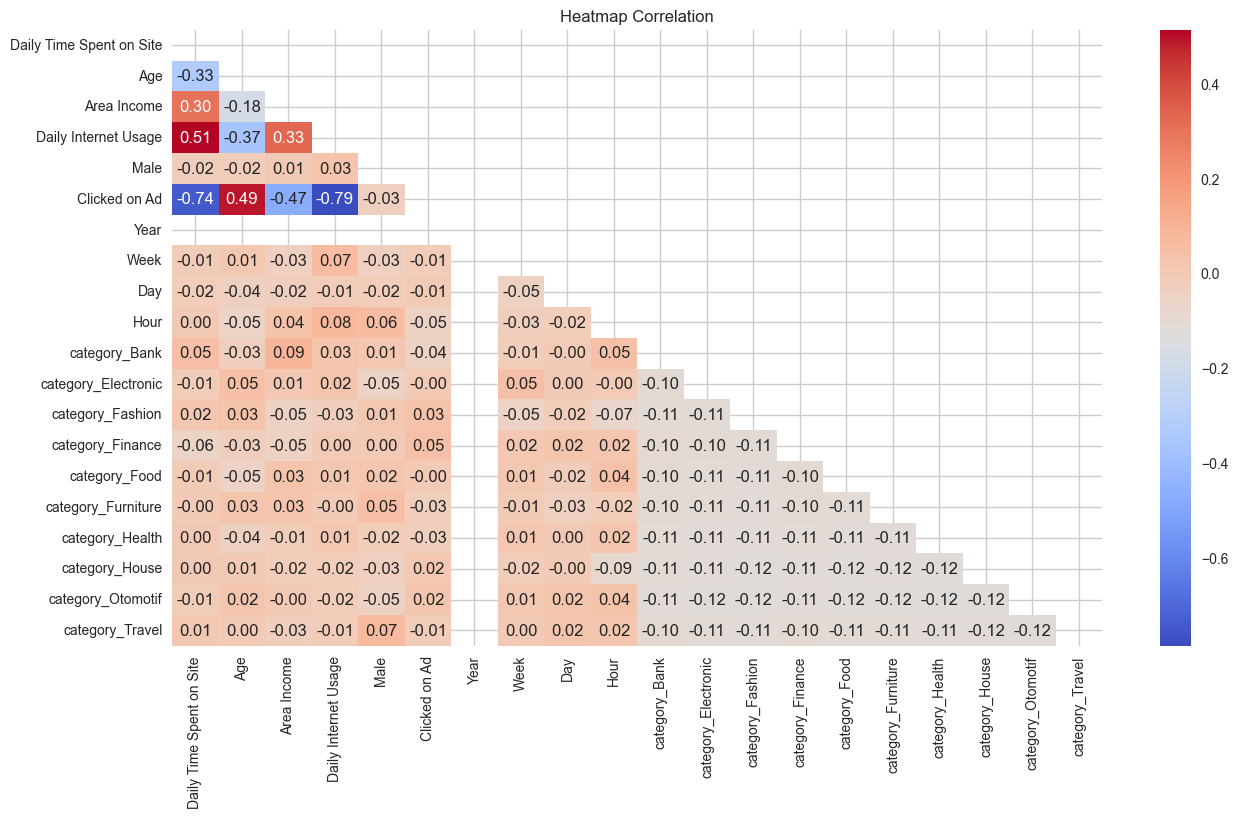

In [35]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

# plot the heatmap
correlation = df_clean.corr()
mask = np.triu(np.ones_like(df_clean.corr(), dtype= bool))
sns.heatmap(correlation, annot=True, mask= mask, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Correlation')
plt.show()

# Data Modelling

In [36]:
df_model = df_clean.copy()
df_model.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Year,Week,Day,Hour,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,0,2016,12,27,0,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,0,2016,14,4,1,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,0,2016,10,13,20,0,1,0,0,0,0,0,0,0,0


In [37]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Year                      1000 non-null   int32  
 7   Week                      1000 non-null   UInt32 
 8   Day                       1000 non-null   int32  
 9   Hour                      1000 non-null   int32  
 10  category_Bank             1000 non-null   uint8  
 11  category_Electronic       1000 non-null   uint8  
 12  category_Fashion          1000 non-null   uint8  
 13  category_Finance          1000 non-null   uint8  
 14  category_

In [38]:
df_model['Week'] = df_model['Week'].astype(int)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Year                      1000 non-null   int32  
 7   Week                      1000 non-null   int32  
 8   Day                       1000 non-null   int32  
 9   Hour                      1000 non-null   int32  
 10  category_Bank             1000 non-null   uint8  
 11  category_Electronic       1000 non-null   uint8  
 12  category_Fashion          1000 non-null   uint8  
 13  category_Finance          1000 non-null   uint8  
 14  category_

In [39]:
# define X (fitur) and y (target)
X = df_model.drop(columns='Clicked on Ad') 
y = df_model['Clicked on Ad']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Create Model Evaluation Function

In [41]:
from datetime import datetime as dt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


def experiment(X_train, X_test, y_train, y_test):
    models = [
        ('Logistic Regression', LogisticRegression(random_state=1)),
        ('KNN', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier(random_state=1)),
        ('SVC', SVC(random_state=1)),
        ('Random Forest', RandomForestClassifier(random_state=1)),
        ('AdaBoost', AdaBoostClassifier(random_state=1)),
        ('Gradient Boosting', GradientBoostingClassifier(random_state=1)),
        ('MLP', MLPClassifier(random_state=1)),
        ('XGBoost', XGBClassifier(random_state=1)),
        ('LGBM', LGBMClassifier(random_state=1))
    ]

    result = []
    for name, model in models:
        start = dt.now()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        duration = (dt.now()-start).total_seconds()

        # evaluasi
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        result.append((name, accuracy, precision, recall, f1, duration))

    df_comparison = pd.DataFrame(result, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'Duration'])
    return df_comparison

## Without Standardization (1)

In [42]:
exp1 = experiment(X_train, X_test, y_train, y_test)
exp1.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1,Duration
9,LGBM,0.956667,0.973154,0.941558,0.957096,0.109917
4,Random Forest,0.950000,0.954248,0.948052,0.951140,0.163323
5,AdaBoost,0.950000,0.954248,0.948052,0.951140,0.080912
6,Gradient Boosting,0.950000,0.954248,0.948052,0.951140,0.164990
8,XGBoost,0.946667,0.953947,0.941558,0.947712,0.162478
2,Decision Tree,0.926667,0.928571,0.928571,0.928571,0.007032
3,SVC,0.686667,0.777778,0.545455,0.641221,0.025000
1,KNN,0.680000,0.710145,0.636364,0.671233,0.170619
7,MLP,0.513333,0.513333,1.000000,0.678414,0.051780
0,Logistic Regression,0.486667,0.000000,0.000000,0.000000,0.019177


## Model Evaluation (1)

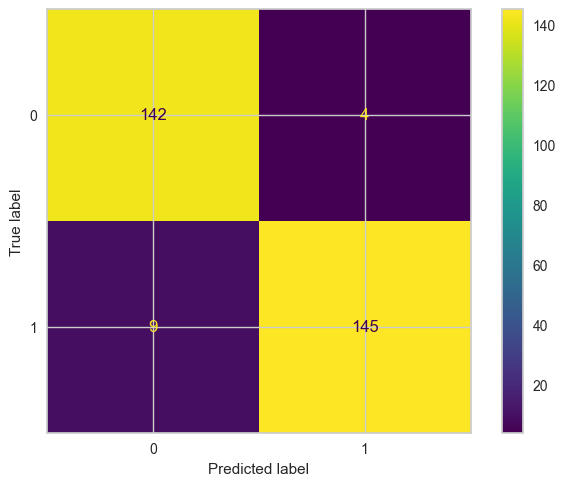

In [43]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_model = LGBMClassifier(random_state=1)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
disp.plot()

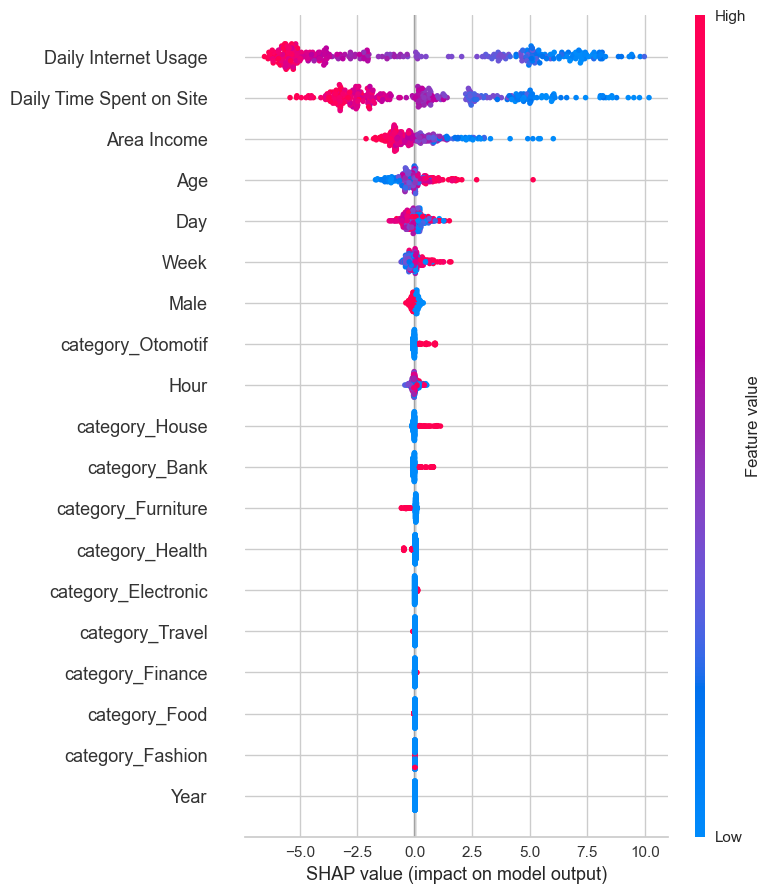

In [44]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)

SHAP Value menunjukkan feature-feature yang berpengaruh adalah:
1. Daily Internet Usage
2. Daily Time Spent on Site
3. Area Income
4. Age
5. Day

Feature `Daily Internet Usage`, `Daily Time Spent on Site`, `Area Income`, dan `Day` menunjukkan hubungan korelasi negative dengan feature target yang ditunjukkan oleh warna merah. Artinya, semakin kecil nilai feature-feature tersebut maka Klik pada Ads semakin besar, begitu pula sebaliknya.


## With Standardization (2)

In [45]:
column = X.columns.values
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X[column] = SS.fit_transform(X)

In [46]:
X.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Year,Week,Day,Hour,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0.252844,-0.114905,0.511468,1.747324,-0.958846,0.0,-0.351967,1.319174,-1.675896,-0.314485,-0.327749,-0.337025,-0.316402,-0.331478,3.033823,-0.340693,-0.349763,-0.355142,-0.329617
1,0.969602,-0.570425,1.006536,0.318199,1.042920,0.0,-0.145958,-1.315508,-1.532166,-0.314485,-0.327749,-0.337025,-0.316402,3.016788,-0.329617,-0.340693,-0.349763,-0.355142,-0.329617
2,0.285886,-1.139826,0.358035,1.298085,-0.958846,0.0,-0.557976,-0.284546,1.198711,-0.314485,3.051111,-0.337025,-0.316402,-0.331478,-0.329617,-0.340693,-0.349763,-0.355142,-0.329617
3,0.583264,-0.798185,-0.015049,1.513417,1.042920,0.0,-1.485018,-0.628200,-1.388436,-0.314485,-0.327749,-0.337025,-0.316402,-0.331478,-0.329617,-0.340693,2.859075,-0.355142,-0.329617
4,0.215989,-0.114905,1.414711,1.047667,-0.958846,0.0,0.678080,-1.430060,-1.244705,-0.314485,-0.327749,-0.337025,3.160540,-0.331478,-0.329617,-0.340693,-0.349763,-0.355142,-0.329617


In [47]:
from sklearn.model_selection import train_test_split
X_train_std, X_test_std, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
exp2 = experiment(X_train_std, X_test_std, y_train, y_test)
exp2.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1,Duration
0,Logistic Regression,0.960000,0.967105,0.954545,0.960784,0.007097
9,LGBM,0.956667,0.973154,0.941558,0.957096,0.119860
3,SVC,0.950000,0.966443,0.935065,0.950495,0.013421
4,Random Forest,0.950000,0.954248,0.948052,0.951140,0.156520
5,AdaBoost,0.950000,0.954248,0.948052,0.951140,0.086175
6,Gradient Boosting,0.950000,0.954248,0.948052,0.951140,0.158149
7,MLP,0.946667,0.948052,0.948052,0.948052,0.432024
8,XGBoost,0.946667,0.953947,0.941558,0.947712,0.062834
1,KNN,0.930000,0.992593,0.870130,0.927336,0.032275
2,Decision Tree,0.926667,0.928571,0.928571,0.928571,0.005997


## Model Evaluation (2)

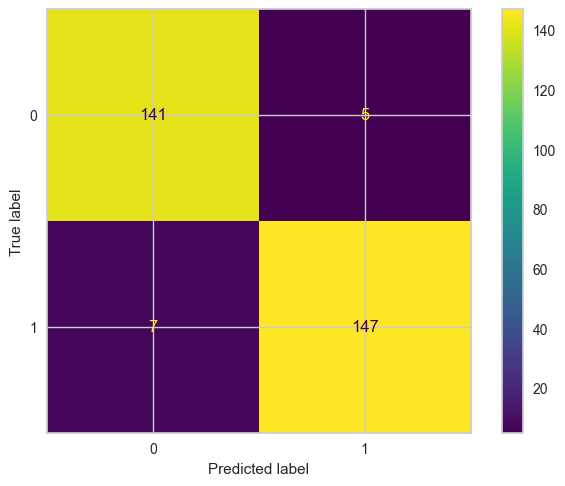

In [49]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_model = LogisticRegression(random_state=1)
final_model.fit(X_train_std, y_train)
y_pred = final_model.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
disp.plot()

TP: 147

TN: 7

FP: 5

FN: 141

# Business Simulation

## Conversion Rate

TP + FP = 152 users as sample.

In [50]:
df_simulation = df_model.sample(152,random_state=24)
clicked_ads = df_simulation[df_simulation['Clicked on Ad']==1]['Clicked on Ad'].count()
unclicked_ads = df_simulation[df_simulation['Clicked on Ad']==0]['Clicked on Ad'].count()

ctr = round(clicked_ads / (len(df_simulation))*100,2)

print("Total Unclicked_ads : ",unclicked_ads)
print("Total Clicked ads : ",clicked_ads)
print("Clicked True Rate (Before Modelling) : ",ctr,"%")

Total Unclicked_ads :  78
Total Clicked ads :  74
Clicked True Rate (Before Modelling) :  48.68 %


In [51]:
unclicked_ads_model = 5 # False Positive (Predicted Clicked Ads, but actual data not clicked)
clicked_ads_model = 147 # TP (Predict clicked ads and actual data is clicked)
ctr = round(clicked_ads_model / (len(df_simulation))*100,2)
print("Clicked True Rate (With Model) : ",ctr,"%")

Clicked True Rate (With Model) :  96.71 %


### Key Takeaways

Conversion Rate with model is ~50% higher than the conversion rate without model. Thus, the model has a big influence to the conversion rate and Revenue for the company.

## Revenue Calculation

**Assumptions** <br>
- Average price of Google Ads per user : 2$

- Revenue from each clicked ads : 5$

In [52]:
cost = 2
Total_cost = round(cost * len(df_simulation),2)
print("Total Cost : ",Total_cost,"$")

Total Cost :  304 $


In [53]:
#Revenue & Profit before modeling
revenue = 5
Total_revenue = revenue * clicked_ads
Profit = round(Total_revenue - Total_cost,2)
print("Total Revenue (Before Modeling) : ",Total_revenue,"$")
print("Profit (Before Modeling) : ",Profit,"$")

Total Revenue (Before Modeling) :  370 $
Profit (Before Modeling) :  66 $


In [54]:
#Revenue & Profit after modeling
revenue = 5
Total_revenue = revenue * clicked_ads_model
Profit = round(Total_revenue - Total_cost,2)
print("Total Revenue (After Modeling) : ",Total_revenue,"$")
print("Profit (After Modeling) : ",Profit,"$")

Total Revenue (After Modeling) :  735 $
Profit (After Modeling) :  431 $


### Key Takeaways


With model, the profit increased from 66 dollar to 431 dollar